In [60]:
import pandas as pd

# Loading the CSV file
data = pd.read_csv('data_cleaning_script/cleaned_data.csv')

# Checking the first few rows of the data
data.head()


,unnamed:_0,job_title,company_name,industry,location,employment_type,salary_range,job_description,required_skills,key_skills,preffered_skills,experience_level,experience_required,language,education,application_link,posting_date,deadline,language_of_posting
0,1,Business-Oriented Bi And Data Analyst,Bunzl Nordic,safety equipment,2670 Greve,Hybrid work,NaN,Your duties will include:Development and maint...,"PowerBI\nDAX, SQL and data modeling\nStrong an...","PowerBI, DAX, SQL",NaN,NaN,1-2 years,English.\nDanish,Not mentioned,https://dk.indeed.com/jobs?q=data+analyst&l=&f...,2024-08-09,NaN,Danish
1,2,Data Analyst/Power Bi Specialist Within Market...,Universal Robots,Robotics,Odense,NaN,NaN,Responsibilities: Extract and transform data f...,5-8 years of experience from marketing analyti...,"PowerBI, SalesForce, Excel",NaN,NaN,5-8 years,English,Not mentioned,https://jobs.teradyne.com/Universal-Robots/job...,NaN,NaN,English
2,3,Junior Business Analyst To Large International...,International Bank,Finance,Copenhagen,Full time,NaN,Responsabilities: Data Analysis and Reporting:...,Someone with some experience as a business ana...,SQL Python,NaN,NaN,NaN,"English, Danish is a plus",NaN,Junior Business Analyst to large international...,NaN,NaN,English
3,4,Business Analyst - Hr / Ta,Pandora,Jewelery,Copenhagen,NaN,NaN,"Serve as a trusted business partner, providing...",A minimum of 2 years of relevant experience in...,A minimum of 2 years of relevant experience in...,NaN,NaN,2 years,NaN,NaN,NaN,NaN,NaN,English
4,5,Junior Bi Analyst,Traffic Lab Aps,Gaming,Copenhagen,NaN,NaN,"Analyze data to identify patterns and trends, ...","Excellent analytical skills, driven by logic a...","Excellent analytical skills, driven by logic a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English


In [54]:
import pandas as pd

# Sample criteria for relevance
criteria = ['Master', 'Bachelor']

# Select and filter columns
education_data = data[['education']]

# Filter rows based on relevance criteria
education_data_filtered = education_data[
    education_data['education'].str.contains('|'.join(criteria), case=False, na=False)
]

# Count occurrences of each criterion
count_master = education_data_filtered['education'].str.contains('Master', case=False, na=False).sum()
count_bachelor = education_data_filtered['education'].str.contains('Bachelor', case=False, na=False).sum()

# Print counts
print(f"Number of times 'Master' is mentioned: {count_master}")
print(f"Number of times 'Bachelor' is mentioned: {count_bachelor}")




Number of times 'Master' is mentioned: 23
Number of times 'Bachelor' is mentioned: 11


In [44]:
print(data.columns)



Index(['unnamed:_0', 'job_title', 'company_name', 'industry', 'location',
       'employment_type', 'salary_range', 'job_description', 'required_skills',
       'key_skills', 'preffered_skills', 'experience_level',
       'experience_required', 'language', 'education', 'application_link',
       'posting_date', 'deadline', 'language_of_posting'],
      dtype='object')


In [55]:
import pandas as pd
import re

# Create a function to handle experience ranges
def extract_experience_range(experience):
    experience = str(experience).lower().strip()  # Normalize the text
    if pd.isna(experience) or 'n/a' in experience or 'several years' in experience:
        return 'Not mentioned'

    # Use regular expressions to find ranges
    range_match = re.findall(r'(\d+)\s*[-]\s*(\d+)', experience)
    if range_match:
        start, end = map(int, range_match[0])
        return list(range(start, end + 1))  # Return range as a list

    # Handle cases like "2+ years" or "3+ years"
    plus_match = re.findall(r'(\d+)\+', experience)
    if plus_match:
        start = int(plus_match[0])
        return list(range(start, start + 3))  # For example, include the next 2 years

    # Handle cases with a single value, like "2 years"
    single_year_match = re.findall(r'(\d+)\s*years?', experience)
    if single_year_match:
        return [int(single_year_match[0])]

    return 'Not mentioned'

# Assuming the column is named 'experience_required'
# Here's how to use it with the existing data table
# (Instead of example data, use the column from the 'data' variable)

# Create a new column with experience in list format
data['experience_list'] = data['experience_required'].apply(extract_experience_range)

# Check the result
print(data[['experience_required', 'experience_list']])


   experience_required experience_list
0            1-2 years          [1, 2]
1            5-8 years    [5, 6, 7, 8]
2                  NaN   Not mentioned
3              2 years             [2]
4                  NaN   Not mentioned
..                 ...             ...
57           2-4 years       [2, 3, 4]
58           1-2 years          [1, 2]
59         2 - 3 years          [2, 3]
60             0 years             [0]
61          2 -3 years          [2, 3]

[62 rows x 2 columns]


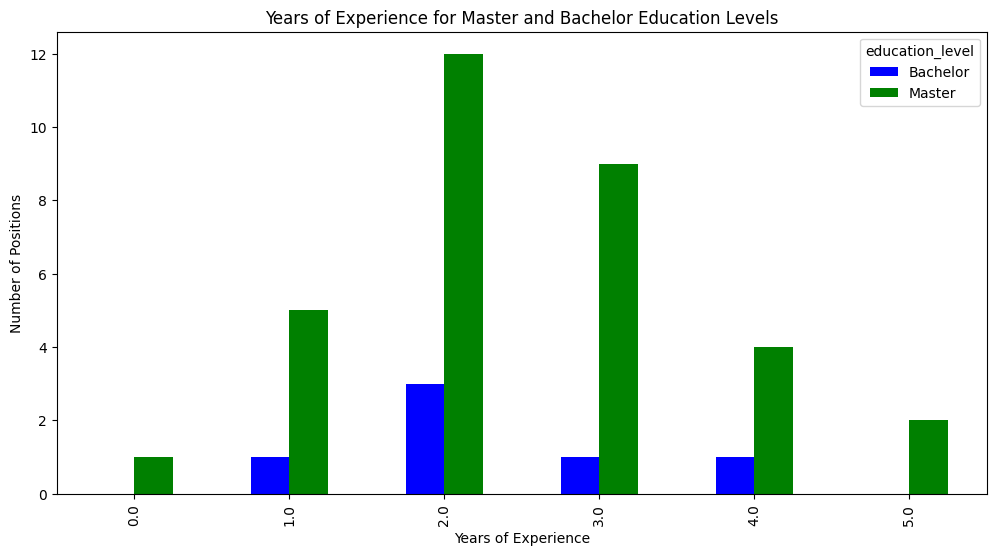

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to determine the level of education
def check_education(education):
    education = str(education).lower().strip()
    if 'master' in education:
        return 'Master'
    elif 'bachelor' in education:
        return 'Bachelor'
    else:
        return None

# Add a new column for education level
data['education_level'] = data['education'].apply(check_education)

# Filter only for Master and Bachelor
filtered_data = data.dropna(subset=['education_level'])

# Expand experience years into separate rows
expanded_data = filtered_data.explode('experience_list')

# Convert each experience year to numeric format
expanded_data['experience_list'] = pd.to_numeric(expanded_data['experience_list'], errors='coerce')

# Remove rows without specified years of experience
expanded_data = expanded_data.dropna(subset=['experience_list'])

# Group data for plotting
plot_data = expanded_data.groupby(['experience_list', 'education_level']).size().unstack().fillna(0)

# Plot the data
plot_data.plot(kind='bar', stacked=False, color=['blue', 'green'], figsize=(12, 6))

# Customize the plot
plt.title('Years of Experience for Master and Bachelor Education Levels')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Positions')
plt.show()




In [59]:
data.head(10)

,unnamed:_0,job_title,company_name,industry,location,employment_type,salary_range,job_description,required_skills,key_skills,...,experience_level,experience_required,language,education,application_link,posting_date,deadline,language_of_posting,experience_list,education_level
0,1,Business-Oriented Bi And Data Analyst,Bunzl Nordic,safety equipment,2670 Greve,Hybrid work,NaN,Your duties will include:Development and maint...,"PowerBI\nDAX, SQL and data modeling\nStrong an...","PowerBI, DAX, SQL",...,NaN,1-2 years,English.\nDanish,Not mentioned,https://dk.indeed.com/jobs?q=data+analyst&l=&f...,2024-08-09,NaN,Danish,"[1, 2]",None
1,2,Data Analyst/Power Bi Specialist Within Market...,Universal Robots,Robotics,Odense,NaN,NaN,Responsibilities: Extract and transform data f...,5-8 years of experience from marketing analyti...,"PowerBI, SalesForce, Excel",...,NaN,5-8 years,English,Not mentioned,https://jobs.teradyne.com/Universal-Robots/job...,NaN,NaN,English,"[5, 6, 7, 8]",None
2,3,Junior Business Analyst To Large International...,International Bank,Finance,Copenhagen,Full time,NaN,Responsabilities: Data Analysis and Reporting:...,Someone with some experience as a business ana...,SQL Python,...,NaN,NaN,"English, Danish is a plus",NaN,Junior Business Analyst to large international...,NaN,NaN,English,Not mentioned,None
3,4,Business Analyst - Hr / Ta,Pandora,Jewelery,Copenhagen,NaN,NaN,"Serve as a trusted business partner, providing...",A minimum of 2 years of relevant experience in...,A minimum of 2 years of relevant experience in...,...,NaN,2 years,NaN,NaN,NaN,NaN,NaN,English,[2],None
4,5,Junior Bi Analyst,Traffic Lab Aps,Gaming,Copenhagen,NaN,NaN,"Analyze data to identify patterns and trends, ...","Excellent analytical skills, driven by logic a...","Excellent analytical skills, driven by logic a...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,Not mentioned,None
5,6,"Senior Data Analyst, Commercial & Marketing",Trustpilot,IT,Copenhagen,Full-Time,NaN,Delivering expert analytics and insights to di...,Deep knowledge of key analytical and statistic...,"Tableau,\nR, Python, SQL, DBT",...,Senior,NaN,NaN,NaN,"Senior Data Analyst, Commercial & Marketing",2024-08-20,NaN,English,Not mentioned,None
6,7,Business Analyst,Nhta,Health,Copenhagen,NaN,NaN,"As a student business analyst, you will be a p...",· Enrolled in a relevant Master’s program or i...,· Enrolled in a relevant Master’s program or i...,...,Student/Entry,NaN,NaN,Enrolled in Master's,\nBusiness Analyst,2024-08-20,NaN,English,Not mentioned,Master
7,8,Business Analyst For Simplification & Regulato...,Danske Bank,Finance,Copenhagen,Hybrid,NaN,The primary focus of this role is to enhance a...,You enjoy having a steep learning curve while ...,Microsoft Excel \nPowerPoint\nEnglish,...,Senior,NaN,Great English,"a master’s degree in finance, economics or sim...",Business Analyst for Simplification & Regulato...,2024-08-20,03/09/2024,English,Not mentioned,Master
8,9,Business Analyst,Dxc Technology,IT,2500 Valby,Full Time,NaN,Implement new legislation behind the final tax...,"has experience as a business analyst, possibly...",Jira\nConfluence\nSQL,...,NaN,NaN,Danish\nEnglish fluently,NaN,Business Analyst,2024-08-01,NaN,English,Not mentioned,None
9,10,Sustainability Analyst With An Interest In Cli...,Jyske Bank,Finance,Silkeborg,Full Time,NaN,Develop and operate our climate initiatives.\n...,motivated by working with an area in developme...,motivated by working with an area in developme...,...,NaN,NaN,NaN,NaN,Sustainability Analyst with an interest in cli...,2024-08-12,02/09/2024,English,Not mentioned,None
